In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib
# thanks to https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

# Cuda Exercise

In [2]:
40*1024*1024*1024/8, 2.8*10**9

(5368709120.0, 2800000000.0)

In [3]:
import time 
n=10000
A = torch.rand([n,n])
B = torch.rand([n,n])
st = time.time()
C = torch.matmul(A,B)
et = time.time()
elapsedCPU = et-st
print ("Took %f seconds"%elapsedCPU)
A = A.cuda()
B = B.cuda()
st = time.time()
C = torch.matmul(A,B)
et = time.time()
elapsedGPU = et-st
print ("Took %f seconds"%(et-st))
print ("Speed-up %f"%(elapsedCPU/elapsedGPU))

Took 27.062835 seconds
Took 0.030217 seconds
Speed-up 895.618200


# Back to SGD

SGD on simple problem

In [0]:
m=100
n=2
np.random.seed(47)
A = np.random.rand(m,n)
xOpt = np.random.randn(n)
b = np.matmul(A,xOpt)
bOrig = b
L = np.max(np.linalg.eig(np.matmul(A.T,A))[0])/m

 

x_vals = np.arange(0, 0.6, .05)
y_vals = np.arange(-0.7, -0.1, 0.05)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (X + Y) * 0
for i in range(m):
  Z+=1/m*0.5*(  A[i,0]*X + A[i,1]*Y - b[i]  )**2

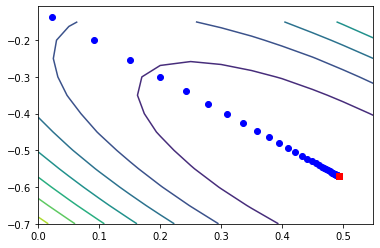

In [5]:
cp = plt.contour(X, Y, Z)
x = xOpt*0
plt.plot(xOpt[0],xOpt[1],'rs')
for it in range(50):
  g =  1/m*np.matmul(A.T, np.matmul(A,x)-b  )
  x = x - 1/L * g 
  plt.plot(x[0],x[1],'bo')
plt.plot(xOpt[0],xOpt[1],'rs')

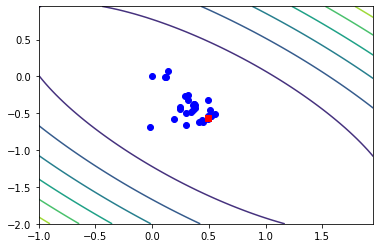

In [6]:
np.random.seed(47)
x_vals = np.arange(-1, 2, .05)
y_vals = np.arange(-2,  1, 0.05)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (X + Y) * 0

# b = bOrig  + 0.1*np.random.randn(m)   # UNCOMMENT FOR NON-CONVERGING SGD
b = bOrig  + 0

for i in range(m):
  Z+=1/m*0.5*(  A[i,0]*X + A[i,1]*Y - b[i]  )**2
cp = plt.contour(X, Y, Z)

x = xOpt*0
plt.plot(x[0],x[1],'bo')
plt.plot(xOpt[0],xOpt[1],'rs')
for it in range(1000):
  i = np.random.randint(m)
  g =  (np.dot(A[i,:],x)-b[i])*A[i,:]
  x = x - 1/L * g 
  plt.plot(x[0],x[1],'bo')
plt.plot(xOpt[0],xOpt[1],'rs')

In [7]:
g

array([0., 0.])